## Regression problem using Scikit-learn

In [3]:
%run ../src.ipynb
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import tensorflow as tf

data = np.loadtxt('../../data/data_sklearn.csv', delimiter=',')

X = data[:,0].reshape((-1,1))
y = data[:,1]

print(f"X.shape = {X.shape}")
print(f"y.shape = {y.shape}")

print(f"Sample X data:\n {X[:5]}")
print(f"Sample y data:\n {y[:5]}")

X.shape = (50, 1)
y.shape = (50,)
Sample X data:
 [[1651.        ]
 [1691.81632653]
 [1732.63265306]
 [1773.44897959]
 [1814.26530612]]
Sample y data:
 [432.64521724 454.93552962 471.52524758 482.50638875 468.35788634]


## Normalize the data
### We could use Scikit-learn as well, or numpy to normalize the data.

In [5]:
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)
Xn = norm_l(X)

print(f"The corresponding normalized sample X data:\n {Xn[:5]}")

The corresponding normalized sample X data:
 [[-1.6977496]
 [-1.6284539]
 [-1.5591578]
 [-1.489862 ]
 [-1.4205662]]


## Train the data

In [6]:
regr = linear_model.LinearRegression(fit_intercept=True)
regr.fit(Xn,y)

print(f"w = {regr.coef_}")
print(f"b = {regr.intercept_}")

w = [137.54897]
b = 718.7573852539062


## Measure the mean square error

In [7]:
yPredict = regr.predict(Xn)
print(f"Mean squared error = {0.5*mean_squared_error(y,yPredict)}")

# Single point prediction:
Xtest = 2500
yhat = regr.predict(norm_l(Xtest))
print(f"Predicted value at x = {Xtest} is {yhat[0]}")

Mean squared error = 442.4153271091174
Predicted value at x = 2500 is 683.4952392578125


## Plot the training data and model predictions

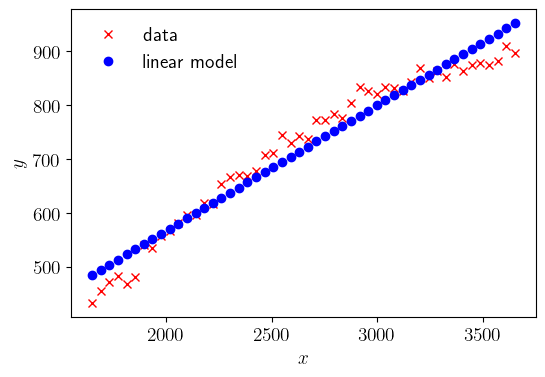

In [8]:
def PLOT(model_label):
    plt.figure(figsize=[6,4])
    plt.plot(X,y, 'xr', label = 'data')
    plt.plot(X,yPredict, 'ob', label = model_label)
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.legend(frameon=False)
    plt.show()
    
PLOT('linear model')

## Using a higher degree polynomial fit

Xmapped.shape = (50, 3)
w = [   0.       414.94818 -278.76398]
b = 718.757568359375
Mean squared error = 62.992534114881735
Predicted value at x = 2500 is 712.2872314453125


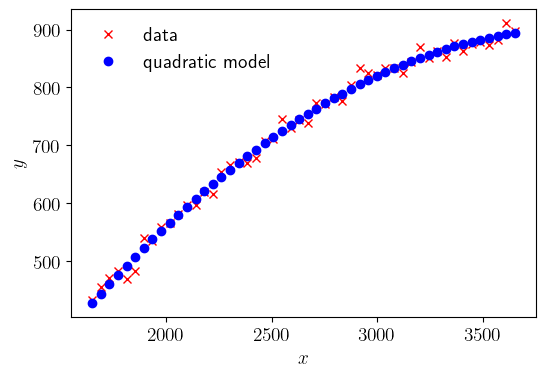

In [9]:
poly = PolynomialFeatures(degree=2, include_bias=True)
Xmapped = poly.fit_transform(X)
print(f"Xmapped.shape = {Xmapped.shape}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(Xmapped)
Xmappedn = norm_l(Xmapped)

regr = linear_model.LinearRegression(fit_intercept=True)
regr.fit(Xmappedn,y)

print(f"w = {regr.coef_}")
print(f"b = {regr.intercept_}")

yPredict = regr.predict(Xmappedn)
print(f"Mean squared error = {0.5*mean_squared_error(y,yPredict)}")

# Single point prediction:
Xtest = 2500
Xtestn = norm_l(poly.fit_transform([[Xtest]])) # normalize after including higher degrees
yhat = regr.predict(Xtestn)
print(f"Predicted value at x = {Xtest} is {yhat[0]}")

PLOT('quadratic model')